##Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score

## Membaca Dataset

In [2]:
data = pd.read_csv("heart.csv")

##Exploratory Data Analysis (EDA)

In [3]:
# Menampilkan data teratas
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Menampilkan data terbawah
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
# Menampilkan ukuran dari array
data.shape

(1025, 14)

In [6]:
# Menampilkan banyak nilai dari target
col_names = ['age',	'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal',	'target']


for col in col_names:
    print(data[col].value_counts())

58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: age, dtype: int64
1    713
0    312
Name: sex, dtype: int64
0    497
2    284
1    167
3     77
Name: cp, dtype: int64
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
126     10
180     10
142      9
115      9
105      9
146      8
148      7
178      7
94       7
144      6
102      6
154      4
117      4
165      4
200      4
114      4
123      4
192      3
106      3
104      3
129      3
174      3
155      3
172      3


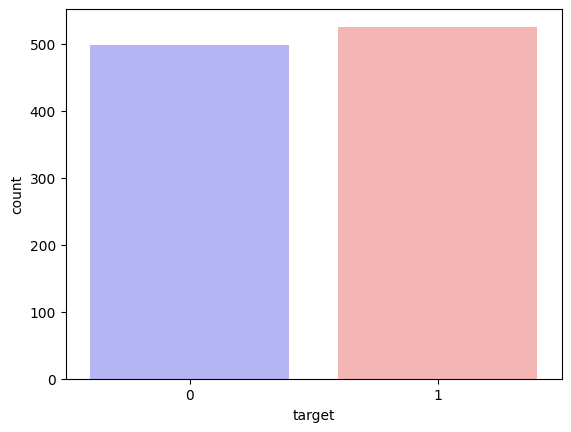

In [7]:
# Menampilkan grafik dari banyaknya nilai dari target
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

In [8]:
# Menampilkan informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
# Menampilkan data yang hilang
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Persentase dari pasien yang tidak mempunyai penyakit jantung: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Persentase dari pasien yang mempunyai penyakit jantung: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Persentase dari pasien yang tidak mempunyai penyakit jantung: 48.68%
Persentase dari pasien yang mempunyai penyakit jantung: 51.32%


In [12]:
# Menampilkan banyak nilai dari sex
data.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [13]:
# Membandingkan kolom target dengan sex
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,86,413
1,226,300


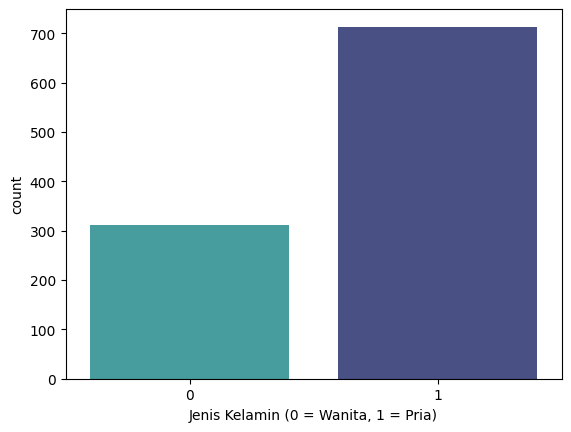

In [14]:
# Menampilkan grafik dari banyaknya nilai dari sex
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Jenis Kelamin (0 = Wanita, 1 = Pria)")
plt.show()

In [15]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Persentase dari pasien Wanita: {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Persentase dari pasien Pria: {:.2f}%".format((countMale / (len(data.sex))*100)))

Persentase dari pasien Wanita: 30.44%
Persentase dari pasien Pria: 69.56%


In [16]:
# Menampilkan nilai rata-rata dari nilai target
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


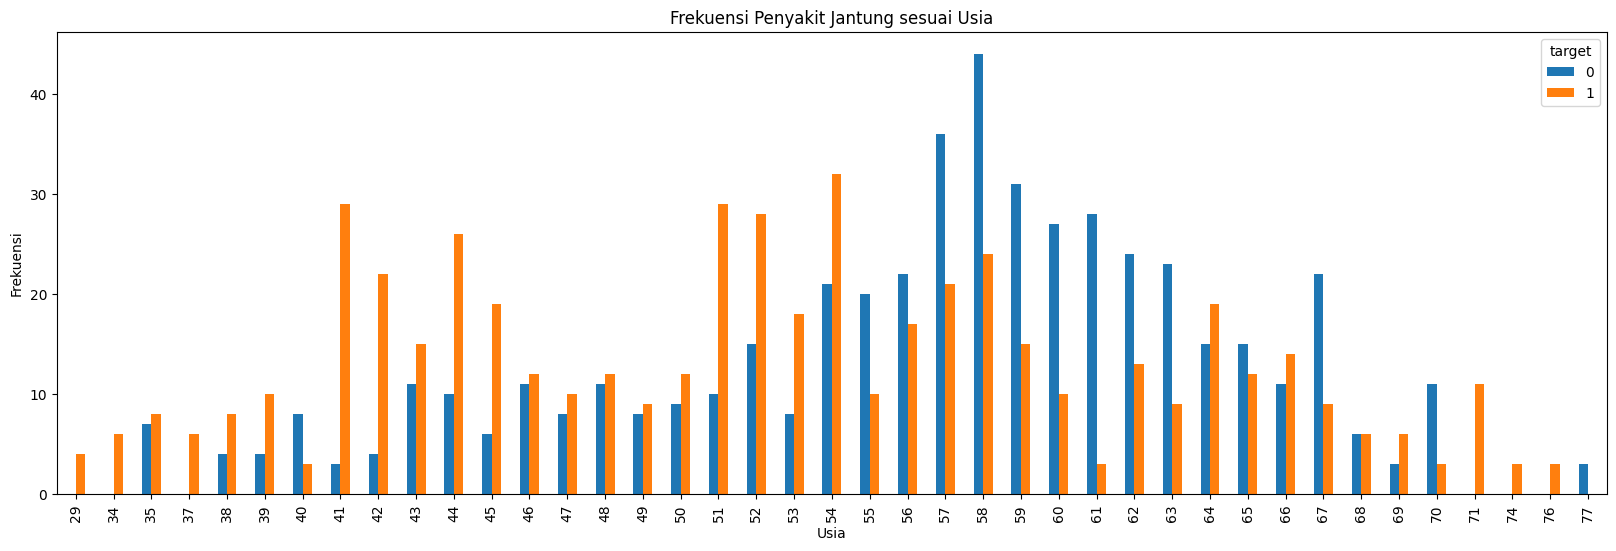

In [17]:
# Membuat plot crosstab
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Frekuensi Penyakit Jantung sesuai Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

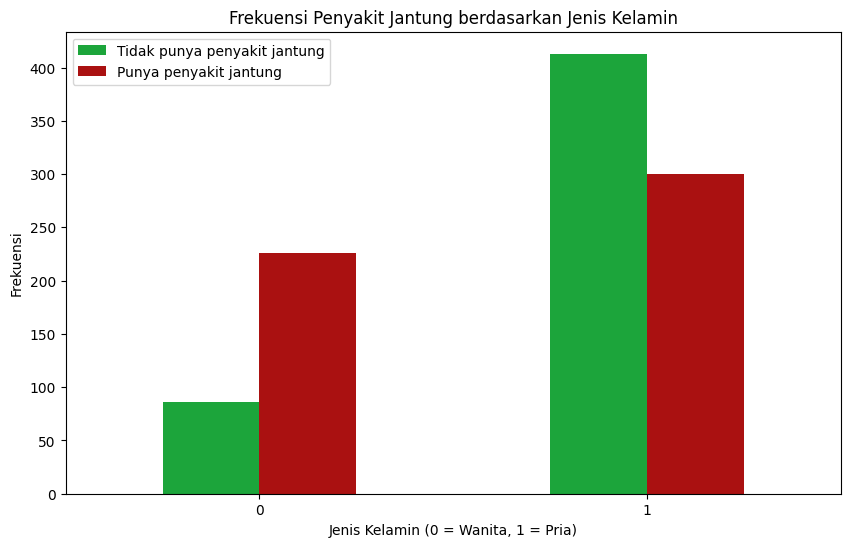

In [18]:
# Membuat plot crosstab
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(10,6),color=['#1CA53B','#AA1111' ])
plt.title('Frekuensi Penyakit Jantung berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin (0 = Wanita, 1 = Pria)')
plt.xticks(rotation=0)
plt.legend(["Tidak punya penyakit jantung", "Punya penyakit jantung"])
plt.ylabel('Frekuensi')
plt.show()

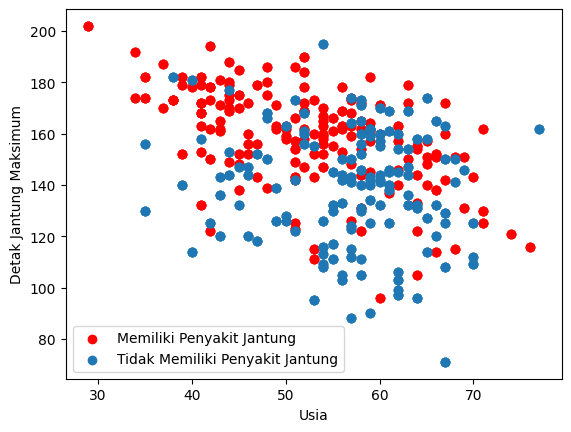

In [19]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Memiliki Penyakit Jantung", "Tidak Memiliki Penyakit Jantung"])
plt.xlabel("Usia")
plt.ylabel("Detak Jantung Maksimum")
plt.show()

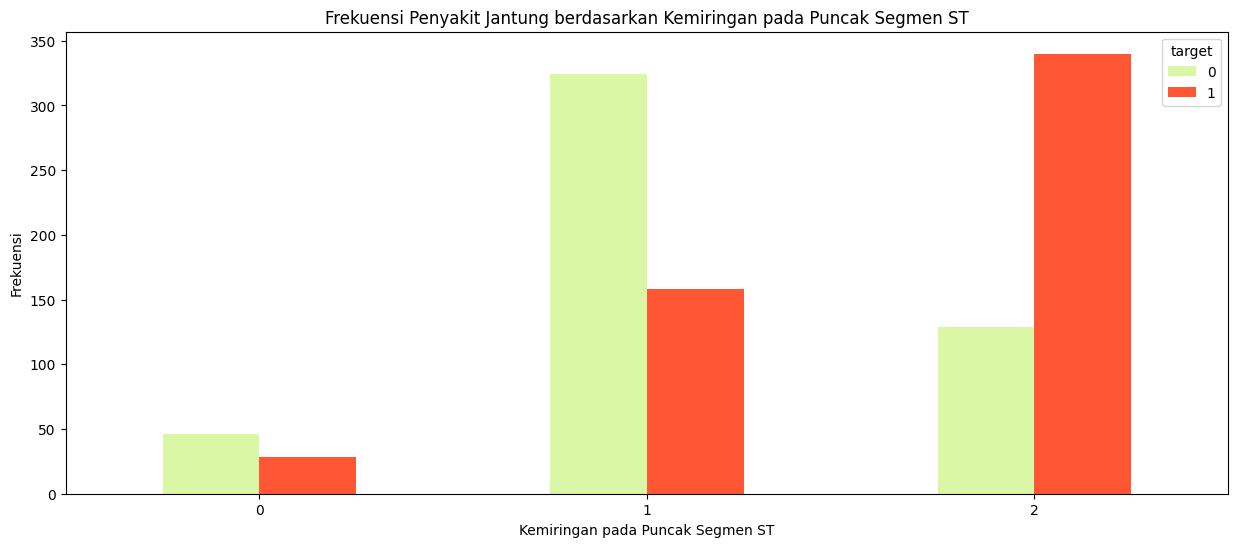

In [20]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Frekuensi Penyakit Jantung berdasarkan Kemiringan pada Puncak Segmen ST')
plt.xlabel('Kemiringan pada Puncak Segmen ST')
plt.xticks(rotation = 0)
plt.ylabel('Frekuensi')
plt.show()

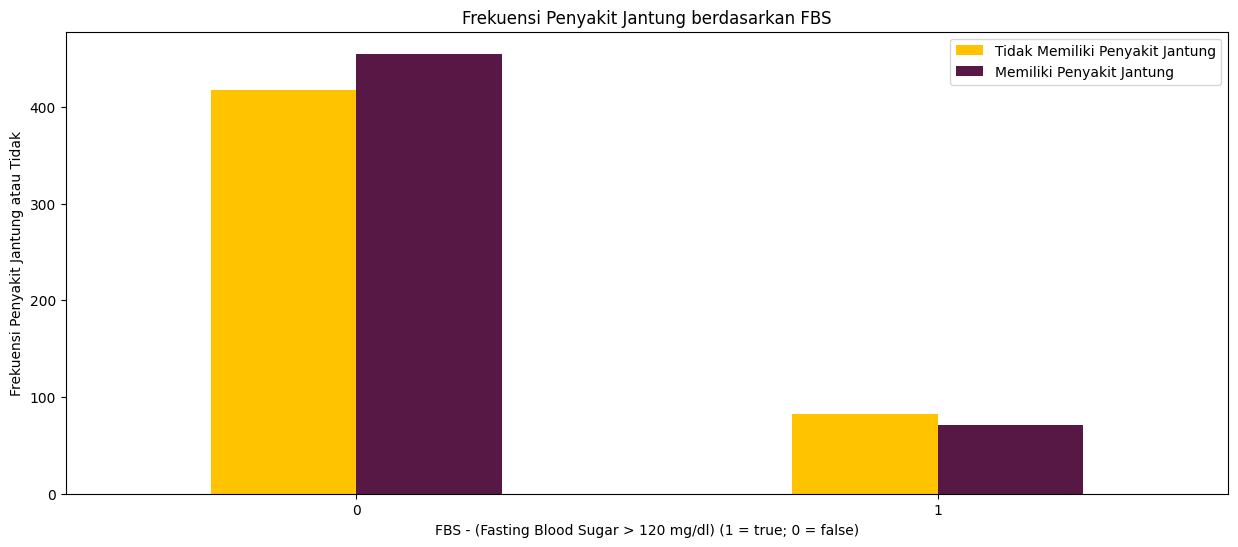

In [21]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Frekuensi Penyakit Jantung berdasarkan FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Tidak Memiliki Penyakit Jantung", "Memiliki Penyakit Jantung"])
plt.ylabel('Frekuensi Penyakit Jantung atau Tidak')
plt.show()

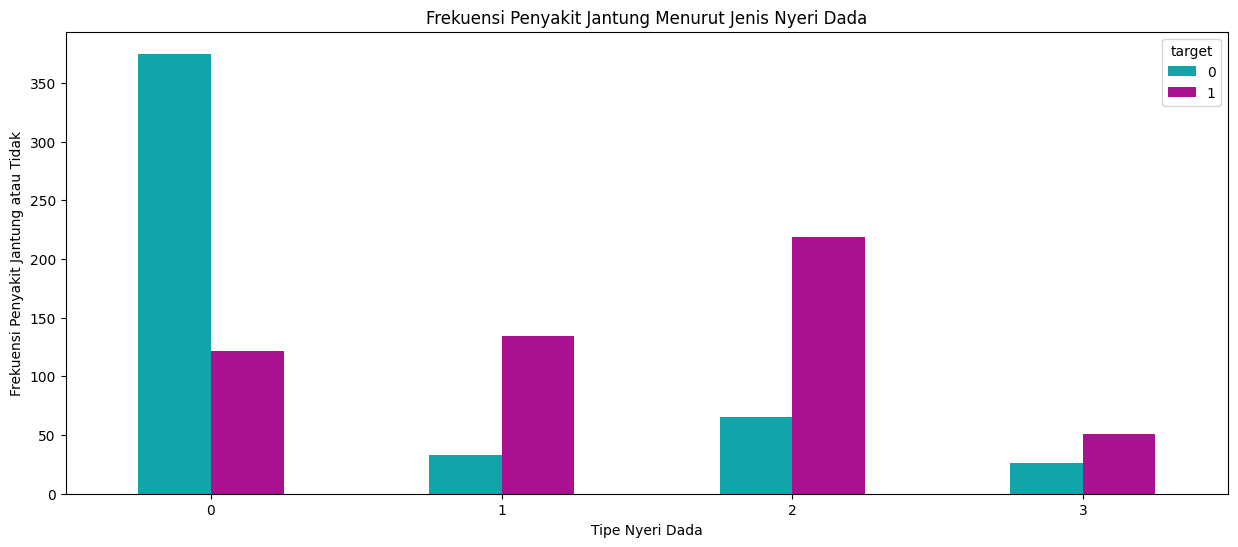

In [22]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Frekuensi Penyakit Jantung Menurut Jenis Nyeri Dada')
plt.xlabel('Tipe Nyeri Dada')
plt.xticks(rotation = 0)
plt.ylabel('Frekuensi Penyakit Jantung atau Tidak')
plt.show()

In [23]:
scaler = MinMaxScaler()

normalized_array = scaler.fit_transform(data[['sex','chol','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']])
normalized_data = pd.DataFrame(normalized_array, columns=['sex','chol','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

data[['sex','chol','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']] = normalized_data

In [24]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1.0,0,125,0.196347,0.0,0.5,168,0.0,1.0,1.0,0.50,1.000000,0
1,53,1.0,0,140,0.175799,1.0,0.0,155,1.0,3.1,0.0,0.00,1.000000,0
2,70,1.0,0,145,0.109589,0.0,0.5,125,1.0,2.6,0.0,0.00,1.000000,0
3,61,1.0,0,148,0.175799,0.0,0.5,161,0.0,0.0,1.0,0.25,1.000000,0
4,62,0.0,0,138,0.383562,1.0,0.5,106,0.0,1.9,0.5,0.75,0.666667,0


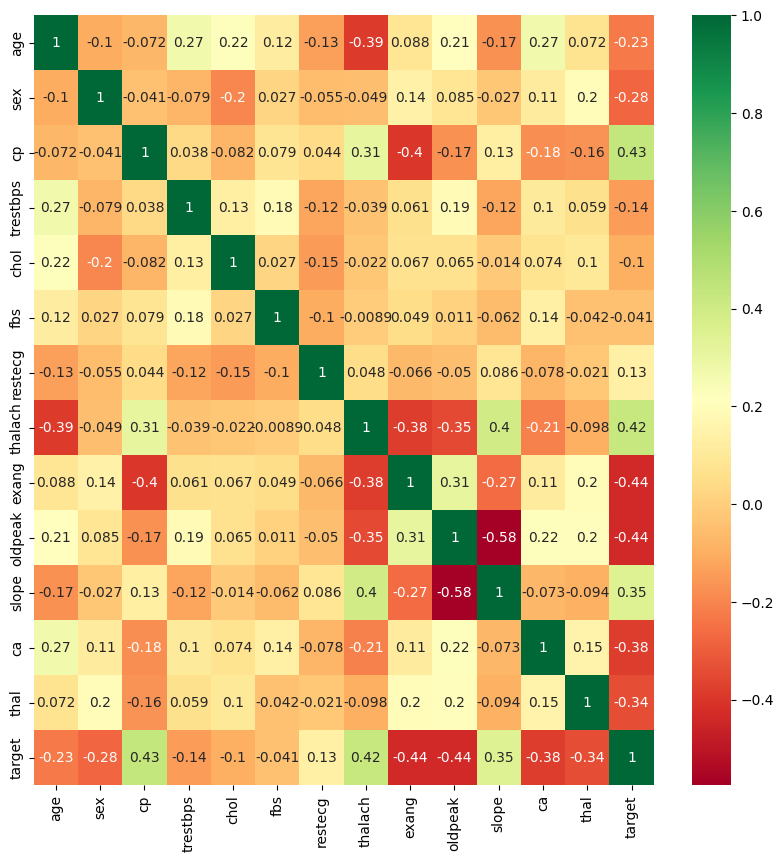

In [25]:
correlations = data.corr()
plt.figure(figsize=(10, 10))

heatmap_heart = sns.heatmap(data[correlations.index].corr(), annot=True, cmap='RdYlGn')

plt.show()

## Modelling Decision Tree

In [26]:
# Split data menjadi data train dan test
X = data.drop(['target'], axis = 1).values 
y = data['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Evaluation

In [27]:
# Training Model
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)

dt_classifier.fit(X_train, y_train)

y_pred_test_gini = dt_classifier.predict(X_test)
y_pred_train_gini = dt_classifier.predict(X_train)

[Text(0.5324074074074074, 0.9285714285714286, 'x[2] <= 0.5\ngini = 0.5\nsamples = 820\nvalue = [401, 419]'),
 Text(0.3425925925925926, 0.7857142857142857, 'x[11] <= 0.125\ngini = 0.372\nsamples = 397\nvalue = [299, 98]'),
 Text(0.24074074074074073, 0.6428571428571429, 'x[12] <= 0.833\ngini = 0.5\nsamples = 169\nvalue = [84, 85]'),
 Text(0.14814814814814814, 0.5, 'x[8] <= 0.5\ngini = 0.383\nsamples = 97\nvalue = [25, 72]'),
 Text(0.07407407407407407, 0.35714285714285715, 'x[4] <= 0.435\ngini = 0.2\nsamples = 62\nvalue = [7, 55]'),
 Text(0.037037037037037035, 0.21428571428571427, 'x[7] <= 96.5\ngini = 0.1\nsamples = 57\nvalue = [3, 54]'),
 Text(0.018518518518518517, 0.07142857142857142, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.05555555555555555, 0.07142857142857142, 'gini = 0.0\nsamples = 54\nvalue = [0, 54]'),
 Text(0.1111111111111111, 0.21428571428571427, 'x[0] <= 61.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.09259259259259259, 0.07142857142857142, 'gini = 0.0\ns

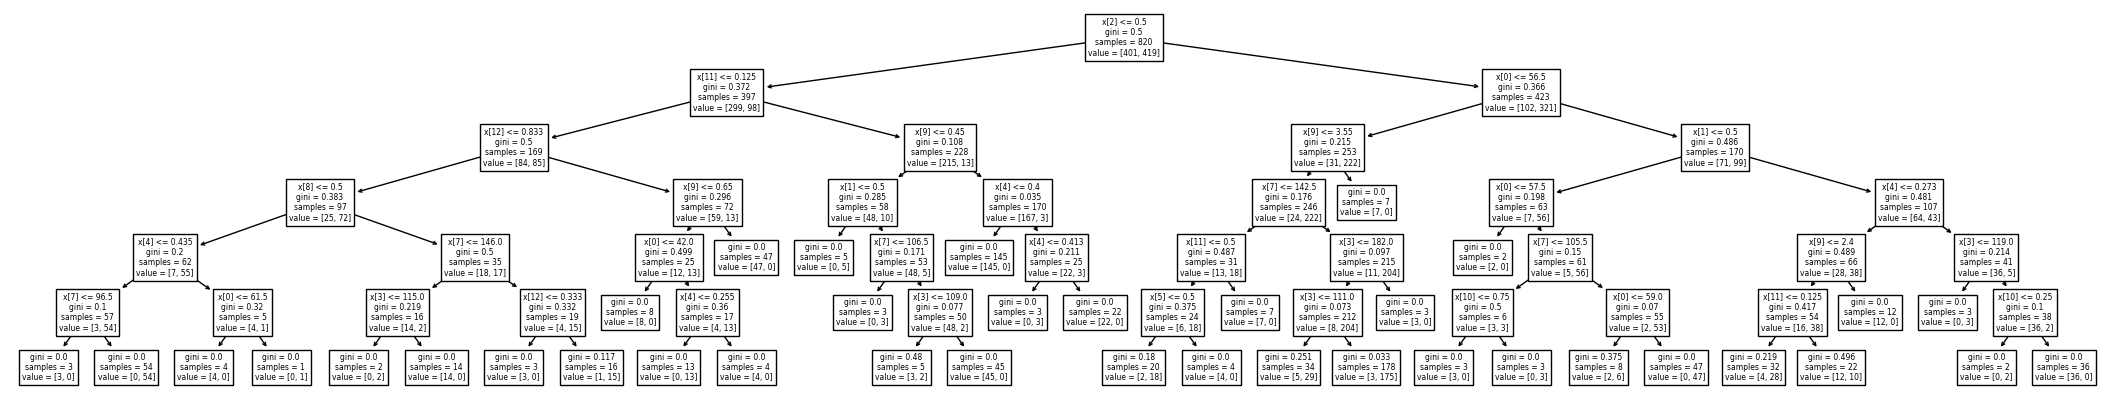

In [28]:
# Menampilkan gambar pohon dari Decision Tree
plt.figure(figsize=(27,5))

from sklearn import tree

tree.plot_tree(dt_classifier.fit(X_train, y_train)) 

## Data Test

In [29]:
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Test-set accuracy score:', dt_classifier.score(X_test, y_test))

Test-set accuracy score: 0.9414634146341463


In [30]:
# Menampilkan nilai akurasi dari model Decision Tree
print(accuracy_score(y_test,y_pred_test_gini))
dt_score1 = (accuracy_score(y_test,y_pred_test_gini))

0.9414634146341463


In [31]:
# Menampilkan nilai precision dari model Decision Tree
print(precision_score(y_test,y_pred_test_gini))
dt_ps1 = (precision_score(y_test,y_pred_test_gini))

0.9279279279279279


In [32]:
# Menampilkan nilai recall dari model Decision Tree
print(recall_score(y_test,y_pred_test_gini))
dt_rs1 = (recall_score(y_test,y_pred_test_gini))

0.9626168224299065


In [33]:
# Menampilkan nilai F1-score dari model Decision Tree
print(f1_score(y_test,y_pred_test_gini))
dt_fs1 = (f1_score(y_test,y_pred_test_gini))

0.944954128440367


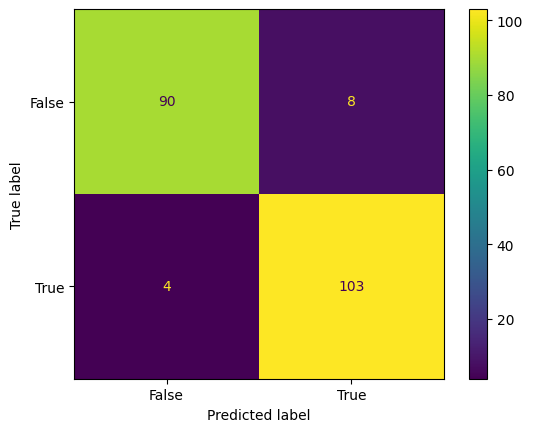

In [34]:
# Menampilkan Confusion Matrix dari data test
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_test_gini)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_gini))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        98
           1       0.93      0.96      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



## Data Train

In [36]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', dt_classifier.score(X_train, y_train))

Training-set accuracy score: 0.9646341463414634


In [37]:
# Menampilkan nilai akurasi dari model Decision Tree
print(accuracy_score(y_train,y_pred_train_gini))
dt_score2 = (accuracy_score(y_train,y_pred_train_gini))

0.9646341463414634


In [38]:
# Menampilkan nilai precision dari model Decision Tree
print(precision_score(y_train,y_pred_train_gini))
dt_ps2 = (precision_score(y_train,y_pred_train_gini))

0.9599056603773585


In [39]:
# Menampilkan nilai recall dari model Decision Tree
print(recall_score(y_train,y_pred_train_gini))
dt_rs2 = (recall_score(y_train,y_pred_train_gini))

0.9713603818615751


In [40]:
# Menampilkan nilai F1-score dari model Decision Tree
print(f1_score(y_train,y_pred_train_gini))
dt_fs2 = (f1_score(y_train,y_pred_train_gini))

0.9655990510083036


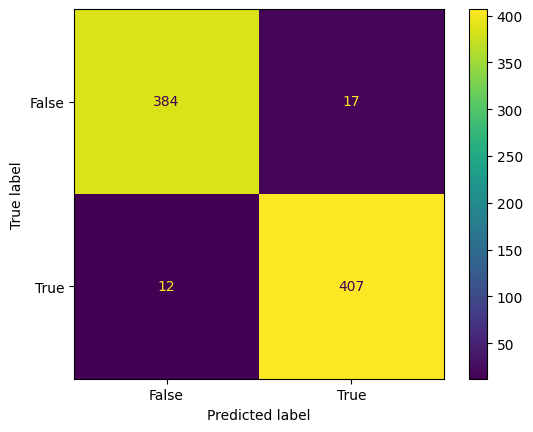

In [41]:
# Menampilkan Confusion Matrix dari data Train
cnf_matrix = confusion_matrix(y_train, y_pred_train_gini)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train_gini))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       401
           1       0.96      0.97      0.97       419

    accuracy                           0.96       820
   macro avg       0.96      0.96      0.96       820
weighted avg       0.96      0.96      0.96       820



## Evaluation Model

In [43]:
accuracy_train = dt_classifier.score(X_train, y_train)
accuracy_test  = dt_classifier.score(X_test, y_test)

In [44]:
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 96.46 %
Akurasi Model (Test)  : 94.15 %


In [45]:
joblib.dump((dt_classifier), "model_heartdisease_dt.model")

['model_heartdisease_dt.model']

In [46]:
data_test = pd.DataFrame(data={
    "in_age" : [45],	
    "in_sex" : [1], 
    "in_cp"	: [0],
    "in_trestbps" : [109],
    "in_chol"	: [1],
    "in_fbs" : [0],
    "in_restecg" : [0],
    "in_exang" : [1],	
    "in_oldpeak" : [2],
    "in_slope"	: [3],
    "in_ca" : [1],
    "in_thal" : [0],
    "in_chol"  : [120],
    "in_thalach" : [190]
})

data_test[0:1]

,in_age,in_sex,in_cp,in_trestbps,in_chol,in_fbs,in_restecg,in_exang,in_oldpeak,in_slope,in_ca,in_thal,in_thalach
0,45,1,0,109,120,0,0,1,2,3,1,0,190


In [47]:
pred_test = dt_classifier.predict(data_test[0:1])
pred_test[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0

## Modelling KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)

    test_accuracy[i] = knn.score(X_test, y_test) 

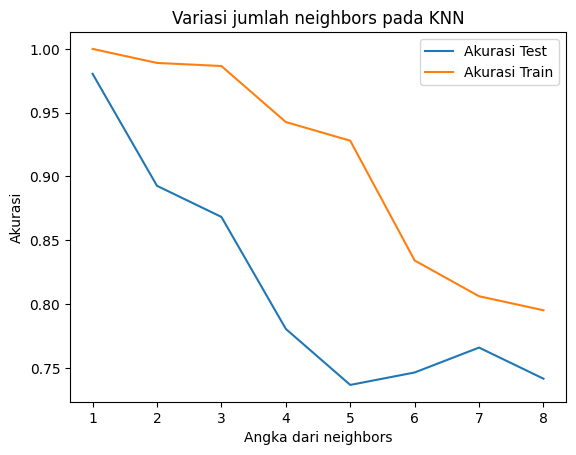

In [49]:
# Menampilkan plot 
plt.title('Variasi jumlah neighbors pada KNN')
plt.plot(neighbors, test_accuracy, label='Akurasi Test')
plt.plot(neighbors, train_accuracy, label='Akurasi Train')
plt.legend()
plt.xlabel('Angka dari neighbors')
plt.ylabel('Akurasi')
plt.show()

In [50]:
# Training Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## Evaluation

In [51]:
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [52]:
joblib.dump((knn), "model2_heartdisease_dt.model")

['model2_heartdisease_dt.model']

## Data Test

In [53]:
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Test-set accuracy score:', dt_classifier.score(X_test, y_test))

Test-set accuracy score: 0.9414634146341463


In [54]:
# Menampilkan nilai akurasi dari model KNN
print(accuracy_score(y_test,y_test_pred))
knn_score1 = (accuracy_score(y_test,y_test_pred))

0.8682926829268293


In [55]:
# Menampilkan nilai precision dari model KNN
print(precision_score(y_test,y_test_pred))
knn_ps1 = (precision_score(y_test,y_test_pred))

0.9081632653061225


In [56]:
# Menampilkan nilai recall dari model KNN
print(recall_score(y_test,y_test_pred))
knn_rs1 = (recall_score(y_test,y_test_pred))

0.8317757009345794


In [57]:
# Menampilkan nilai F1-score dari model KNN
print(f1_score(y_test,y_test_pred))
knn_fs1 = (f1_score(y_test,y_test_pred))

0.8682926829268293


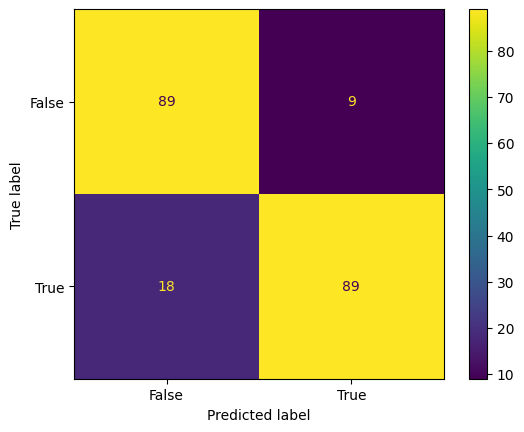

In [58]:
# Menampilkan Confusin Matrix dari data test
cnf_matrix = confusion_matrix(y_test,y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [59]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        98
           1       0.91      0.83      0.87       107

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



## Data Train

In [60]:
# Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', dt_classifier.score(X_train, y_train))

Training-set accuracy score: 0.9646341463414634


In [61]:
# Menampilkan nilai akurasi dari model KNN
print(accuracy_score(y_train,y_train_pred))
knn_score2 = (accuracy_score(y_train,y_train_pred))

0.9865853658536585


In [62]:
# Menampilkan nilai precision dari model KNN
print(precision_score(y_train,y_train_pred))
knn_ps2 = (precision_score(y_train,y_train_pred))

0.9951456310679612


In [63]:
# Menampilkan nilai recall dari model KNN
print(recall_score(y_train,y_train_pred))
knn_rs2 = (recall_score(y_train,y_train_pred))

0.9785202863961814


In [64]:
# Menampilkan nilai F1-score dari model KNN
print(f1_score(y_train,y_train_pred))
knn_fs2 = (f1_score(y_train,y_train_pred))

0.98676293622142


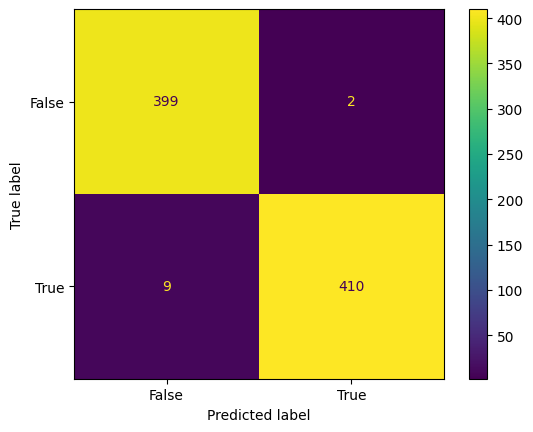

In [65]:
# Menampilan Confusion Matrix dari data train
cnf_matrix = confusion_matrix(y_train,y_train_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [66]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       401
           1       1.00      0.98      0.99       419

    accuracy                           0.99       820
   macro avg       0.99      0.99      0.99       820
weighted avg       0.99      0.99      0.99       820



## Modelling AdaBoost


In [67]:
# Training Model
from sklearn.ensemble import AdaBoostClassifier

ab_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=0)

model_adaboost = ab_classifier.fit(X_train, y_train)

y_test_pred = model_adaboost.predict(X_test)
y_train_pred = model_adaboost.predict(X_train)

In [68]:
joblib.dump((ab_classifier), "model3_heartdisease_dt.model")

['model3_heartdisease_dt.model']

## Data Test

In [69]:
#Menampilkan nilai akurasi untuk prediksi di data test
print('Test-set accuracy score:', ab_classifier.score(X_test, y_test))

Test-set accuracy score: 0.8829268292682927


In [70]:
# Menampilkan nilai akurasi dari model AdaBoost
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_test_pred))
ab_score1 = accuracy_score(y_test, y_test_pred)

AdaBoost Classifier Model Accuracy: 0.8829268292682927


In [71]:
# Menampilkan nilai precision dari model AdaBoost
print(precision_score(y_test,y_test_pred))
ab_ps1 = (precision_score(y_test,y_test_pred))

0.8608695652173913


In [72]:
# Menampilkan nilai recall dari model AdaBoost
print(recall_score(y_test,y_test_pred))
ab_rs1 = (recall_score(y_test,y_test_pred))

0.9252336448598131


In [73]:
# Menampilkan nilai F1-score dari model AdaBoost
print(f1_score(y_test,y_test_pred))
ab_fs1 = (f1_score(y_test,y_test_pred))

0.891891891891892


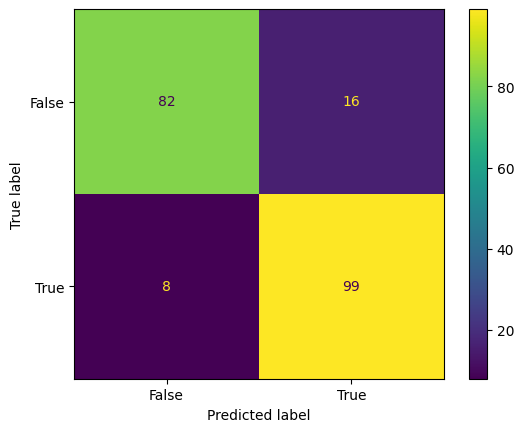

In [74]:
# Menampilan Confusion Matrix dari data test
cnf_matrix = confusion_matrix(y_test,y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [75]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        98
           1       0.86      0.93      0.89       107

    accuracy                           0.88       205
   macro avg       0.89      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



## Data Train

In [76]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', ab_classifier.score(X_train, y_train))

Training-set accuracy score: 0.8670731707317073


In [77]:
# Menampilkan nilai akurasi dari model AdaBoost
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_train, y_train_pred))
ab_score2 = accuracy_score(y_train, y_train_pred)

AdaBoost Classifier Model Accuracy: 0.8670731707317073


In [78]:
# Menampilkan nilai precision dari model AdaBoost
print(precision_score(y_train,y_train_pred))
ab_ps2 = (precision_score(y_train,y_train_pred))

0.8490990990990991


In [79]:
# Menampilkan nilai recall dari model AdaBoost
print(recall_score(y_train,y_train_pred))
ab_rs2 = (recall_score(y_train,y_train_pred))

0.8997613365155132


In [80]:
# Menampilkan nilai F1-score dari model AdaBoost
print(f1_score(y_train,y_train_pred))
ab_fs2 = (f1_score(y_train,y_train_pred))

0.8736964078794901


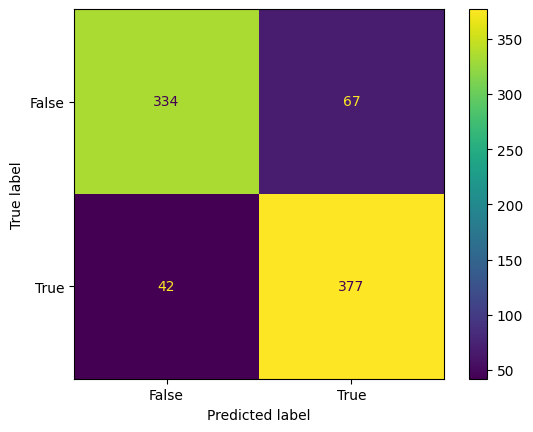

In [81]:
# Menampilan Confusion Matrix dari data train
cnf_matrix = confusion_matrix(y_train,y_train_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [82]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       401
           1       0.85      0.90      0.87       419

    accuracy                           0.87       820
   macro avg       0.87      0.87      0.87       820
weighted avg       0.87      0.87      0.87       820



## Modelling XGBoost

In [83]:
# # Split data menjadi data train dan test
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(n_estimators=50, max_depth=6, learning_rate=0.1, subsample=0.5)
xgb_classifier = xgb_classifier.fit(X_train, y_train)

# Training Model
y_test_pred = xgb_classifier.predict(X_test)
y_train_pred = xgb_classifier.predict(X_train)

In [84]:
accuracy_train = xgb_classifier.score(X_train, y_train)
accuracy_test  = xgb_classifier.score(X_test, y_test)

In [85]:
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 99.76 %
Akurasi Model (Test)  : 99.51 %


In [86]:
joblib.dump((xgb_classifier), "model4_heartdisease_dt.model")

['model4_heartdisease_dt.model']

## Prediction

In [87]:
data_test = pd.DataFrame(data={
    "in_age" : [45],	
    "in_sex" : [1], 
    "in_cp"	: [0],
    "in_trestbps" : [109],
    "in_chol"	: [1],
    "in_fbs" : [0],
    "in_restecg" : [0],
    "in_exang" : [1],	
    "in_oldpeak" : [2],
    "in_slope"	: [3],
    "in_ca" : [1],
    "in_thal" : [0],
    "in_chol"  : [120],
    "in_thalach" : [190]
})

data_test[0:1]

,in_age,in_sex,in_cp,in_trestbps,in_chol,in_fbs,in_restecg,in_exang,in_oldpeak,in_slope,in_ca,in_thal,in_thalach
0,45,1,0,109,120,0,0,1,2,3,1,0,190


In [88]:
pred_test = xgb_classifier.predict(data_test[0:1])
pred_test[0]

0

## Data Test

In [89]:
# Menampilkan nilai akurasi untuk prediksi di data testing
print('Test-set accuracy score:', xgb_classifier.score(X_test, y_test))

Test-set accuracy score: 0.9951219512195122


In [90]:
# Menampilkan nilai akurasi dari model XGBoost
print("Accuracy score XGBoost: %.2f" % (accuracy_score(y_test, y_test_pred)))
xgb_score1 = (accuracy_score(y_test, y_test_pred))

Accuracy score XGBoost: 1.00


In [91]:
# Menampilkan nilai precision dari model XGBoost
print(precision_score(y_test,y_test_pred))
xgb_ps1 = (precision_score(y_test,y_test_pred))

1.0


In [92]:
# Menampilkan nilai recall dari model XGBoost
print(recall_score(y_test,y_test_pred))
xgb_rs1 = (recall_score(y_test,y_test_pred))

0.9906542056074766


In [93]:
# Menampilkan nilai F1-score dari model XGBoost
print(f1_score(y_test,y_test_pred))
xgb_fs1 = (f1_score(y_test,y_test_pred))

0.9953051643192489


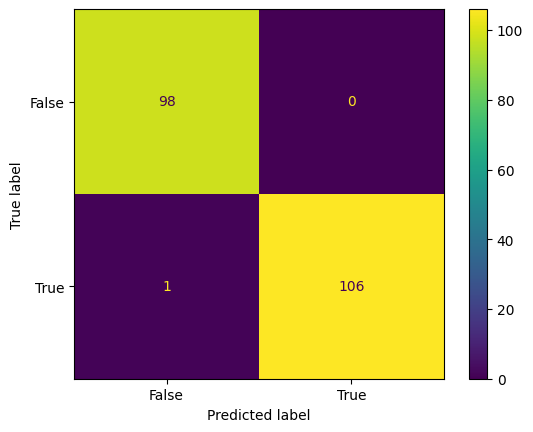

In [94]:
# Menampilan Confusion Matrix dari data test
cnf_matrix = confusion_matrix(y_test,y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [95]:
print((classification_report(y_test, y_test_pred)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        98
           1       1.00      0.99      1.00       107

    accuracy                           1.00       205
   macro avg       0.99      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



## Data Train

In [96]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', xgb_classifier.score(X_train, y_train))

Training-set accuracy score: 0.9975609756097561


In [97]:
# Menampilkan nilai akurasi dari model XGBoost
print("Accuracy score XGBoost: %.2f" % (accuracy_score(y_train, y_train_pred)))
xgb_score2 = (accuracy_score(y_train, y_train_pred))

Accuracy score XGBoost: 1.00


In [98]:
# Menampilkan nilai precision dari model XGBoost
print(precision_score(y_train,y_train_pred))
xgb_ps2 = (precision_score(y_train,y_train_pred))

1.0


In [99]:
# Menampilkan nilai recall dari model XGBoost
print(recall_score(y_train,y_train_pred))
xgb_rs2 = (recall_score(y_train,y_train_pred))

0.9952267303102625


In [100]:
# Menampilkan nilai F1-score dari model XGBoost
print(f1_score(y_train,y_train_pred))
xgb_fs2 = (f1_score(y_train,y_train_pred))

0.9976076555023923


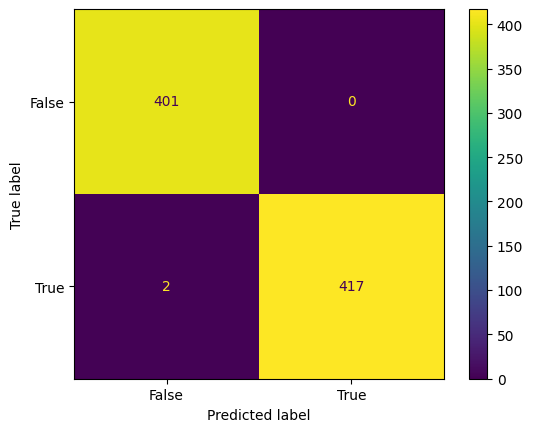

In [101]:
# Menampilan Confusion Matrix dari data train
cnf_matrix = confusion_matrix(y_train,y_train_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [102]:
print((classification_report(y_train, y_train_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       419

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



## Perbandingan Model Data Test

In [103]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'KNN', 
              'XGBoost', 'AdaBoost'],
    'Accuracy': [dt_score1, knn_score1, xgb_score1, ab_score1],
    'Precision ': [dt_ps1, knn_ps1, ab_ps1, xgb_ps1],
    'Recall': [dt_rs1, knn_rs1, ab_rs1, xgb_rs1],
    'F1-Score': [dt_fs1, knn_fs1, ab_fs1, xgb_fs1]})
result_data = results.sort_values(by='Accuracy', ascending=False)
result_data = result_data.set_index('Model')
result_data

,Accuracy,Precision,Recall,F1-Score
Model,,,,
XGBoost,0.995122,0.860870,0.925234,0.891892
Decision Tree,0.941463,0.927928,0.962617,0.944954
AdaBoost,0.882927,1.000000,0.990654,0.995305
KNN,0.868293,0.908163,0.831776,0.868293


## Perbandingan Model Data Train

In [104]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'KNN', 
              'XGBoost', 'AdaBoost'],
    'Accuracy': [dt_score2, knn_score2, xgb_score2, ab_score2],
    'Precision ': [dt_ps2, knn_ps2, ab_ps2, xgb_ps2],
    'Recall': [dt_rs2, knn_rs2, ab_rs2, xgb_rs2],
    'F1-Score': [dt_fs2, knn_fs2, ab_fs2, xgb_fs2]})
result_data = results.sort_values(by='Accuracy', ascending=False)
result_data = result_data.set_index('Model')
result_data

,Accuracy,Precision,Recall,F1-Score
Model,,,,
XGBoost,0.997561,0.849099,0.899761,0.873696
KNN,0.986585,0.995146,0.978520,0.986763
Decision Tree,0.964634,0.959906,0.971360,0.965599
AdaBoost,0.867073,1.000000,0.995227,0.997608
